In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Downloads/amazon_alexa.tsv',delimiter = '\t',quoting = 3)

In [3]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df.columns

Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [5]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(3150, 5)

In [8]:
print(f"'verified_reviews' column value: {df.iloc[10]['verified_reviews']}") 
print(f"Length of review : {len(df.iloc[10]['verified_reviews'])}") 


'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65


In [9]:
df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
dtype: object

In [10]:
print(f"Rating value count: \n{df['rating'].value_counts()}")

Rating value count: 
5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64


Text(0.5, 1.0, 'Rating distribution count')

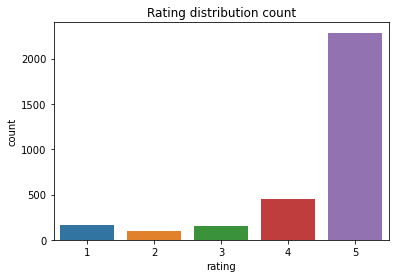

In [11]:
sns.countplot(x=df['rating'])
plt.title('Rating distribution count')

In [12]:
grouped_data = df.groupby('rating').size().reset_index(name='Count')
grouped_data


,rating,Count
0,1,161
1,2,96
2,3,152
3,4,455
4,5,2286


([<matplotlib.patches.Wedge at 0x7fc5381e1700>,
 [Text(-0.17586930115186672, 1.0858498924401818, '1'),
  Text(-0.4454049719427256, 1.0057904408815486, '2'),
  Text(-0.6780917742525008, 0.8661359856807104, '3'),
  Text(-1.0504812679031135, 0.3263266856765891, '4'),
  Text(0.8348413403481645, -0.71626806186349, '5')],
 [Text(-0.09592870971920002, 0.5922817595128264, '5.1%'),
  Text(-0.24294816651421394, 0.5486129677535719, '3.0%'),
  Text(-0.369868240501364, 0.4724378103712965, '4.8%'),
  Text(-0.5729897824926072, 0.1779963740054122, '14.4%'),
  Text(0.45536800382627146, -0.3906916701073581, '72.6%')])

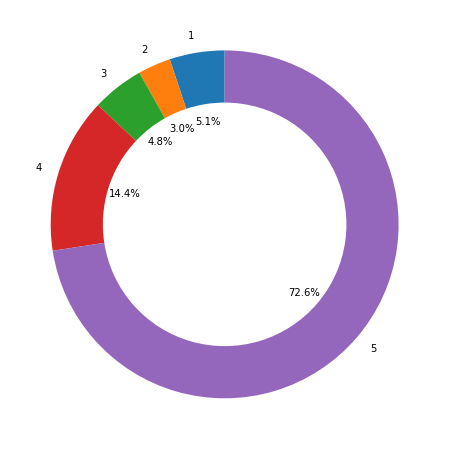

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['Count'], labels=grouped_data['rating'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

In [14]:
review_0 = df[df['feedback'] == 0].iloc[0]['verified_reviews']
review_1 = df[df['feedback'] == 0].iloc[11]['verified_reviews']
print(review_0)
print(review_1)
review_00 = df[df['feedback'] == 1].iloc[0]['verified_reviews']
review_11 = df[df['feedback'] == 1].iloc[11]['verified_reviews']
print('\n')
print(review_00)
print(review_11)

"It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals."
This thing barely works. You have to select 3rd party apps to do stuff you'd think it could do out of the box. I'm sending mine back asap. Waste of money.


Love my Echo!
I love it! Learning knew things with it eveyday! Still figuring out how everything works but so far it's been easy to use and understand. She does make me laugh at times


Text(0.5, 1.0, 'Feedback distribution count')

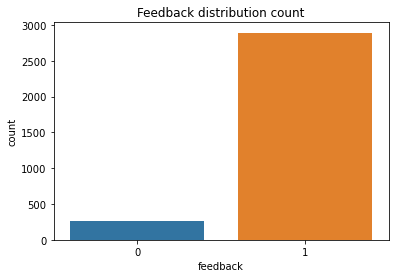

In [15]:
sns.countplot(x=df['feedback'])
plt.title('Feedback distribution count')

In [16]:
grouped_data1 = df.groupby('feedback').size().reset_index(name='Count')
grouped_data1



,feedback,Count
0,0,257
1,1,2893


([<matplotlib.patches.Wedge at 0x7fc519686790>,
 [Text(-0.2788684353938771, 1.0640640938124786, '0'),
  Text(0.2788683855814418, -1.064064106867251, '1')],
 [Text(-0.15211005566938748, 0.5803985966249882, '8.2%'),
  Text(0.1521100284989682, -0.5803986037457731, '91.8%')])

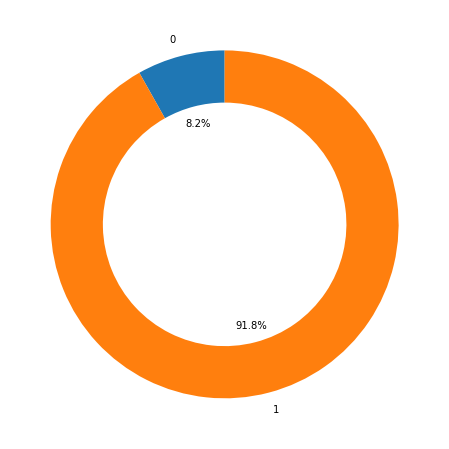

In [17]:
plt.figure(figsize=(8, 8))
plt.pie(grouped_data1['Count'], labels=grouped_data1['feedback'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

<AxesSubplot:>

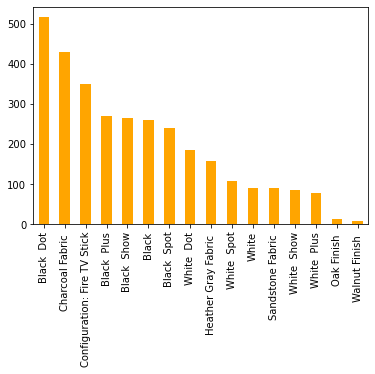

In [18]:
df['variation'].value_counts().plot.bar(color = 'orange')

In [19]:
df['length'] = df['verified_reviews'].apply(len)

In [20]:
df['length'].describe()

count    3150.000000
mean      132.673651
std       182.526953
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

In [21]:
df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


[Text(0.5, 1.0, 'Distribution of length of review ')]

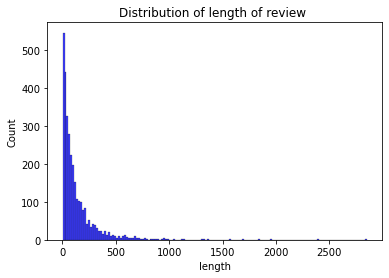

In [22]:
sns.histplot(df['length'],color='blue').set(title='Distribution of length of review ')


/Users/rithvik/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution of length of review ')]

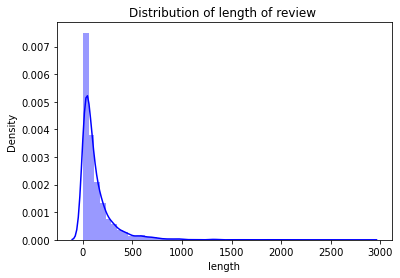

In [23]:
sns.distplot(df['length'],color='blue').set(title='Distribution of length of review ')

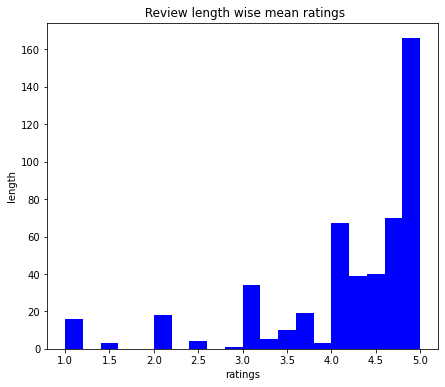

In [24]:
df.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df.verified_reviews)


In [27]:
reviews = " ".join(df['verified_reviews'])


In [28]:
print(reviews)

Love my Echo! Loved it! "Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home." "I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well." Music "I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do." "Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet." I think this is the 5th one I've purchased. I'm workin

In [42]:
neg_reviews = " ".join(df[df['feedback'] == 0]['verified_reviews'])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join(df[df['feedback'] == 1]['verified_reviews'])
pos_reviews = pos_reviews.lower().split()




In [37]:
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

In [43]:
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rithvik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
import re

In [46]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [49]:
cv = CountVectorizer(max_features = 2500)


X = cv.fit_transform(corpus).toarray()
y = df['feedback'].values

In [50]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3150, 2500)
y shape: (3150,)


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [53]:
from xgboost import XGBClassifier

In [54]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
print("Training Accuracy :", model_xgb.score(X_train, y_train))
print("Testing Accuracy :", model_xgb.score(X_test, y_test))

Training Accuracy : 0.9700680272108844
Testing Accuracy : 0.9407407407407408


In [56]:
y_preds = model_xgb.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [59]:
cm = confusion_matrix(y_test, y_preds)
print(cm)


[[ 27  48]
 [  8 862]]


In [61]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")

# Calculate F1 score
f1 = f1_score(y_test, y_preds)
print(f"F1 Score: {f1}")

Accuracy: 0.9407407407407408
F1 Score: 0.9685393258426965


In [62]:
from sklearn.tree import DecisionTreeClassifier

In [63]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [64]:
y_preds = model_dt.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [66]:
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
conf_matrix = confusion_matrix(y_test, y_preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.9142857142857143
Precision: 0.9508571428571428
Recall: 0.9563218390804598
F1 Score: 0.9535816618911175
Confusion Matrix:
[[ 32  43]
 [ 38 832]]
